In [27]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

In [29]:
max(len(l) for l in x_train)

2494

In [30]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [31]:
sum(map(len, x_train)) / len(x_train)

238.71364

In [32]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [33]:
import tensorflow as tf

In [34]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w1 = Dense(units)
        self.w2 = Dense(units)
        self.v = Dense(1)
        
    def call(self, values, query):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.v(tf.nn.tanh(self.w1(values) + self.w2(
        hidden_with_time_axis)))
        
        attention_weights = tf.nn.softmax(score, axis=1)
        
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

In [35]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
from tensorflow.keras.layers import LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [36]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len,
                              mask_zero=True)(sequence_input)
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences=True))(embedded_sequences)

In [37]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64,
                                                                       dropout=0.5,
                                                                        return_sequences=True,
                                                                       return_state = True))(lstm)

In [38]:
lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape

(TensorShape([None, 500, 128]),
 TensorShape([None, 64]),
 TensorShape([None, 64]),
 TensorShape([None, 64]),
 TensorShape([None, 64]))

In [39]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [40]:
attention = BahdanauAttention(64)
context_vector, attention_weights = attention(lstm, state_h)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [41]:
dense1 = Dense(20, activation='relu')(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)
model = Model(inputs=sequence_input, outputs=output)

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
from tensorflow.keras.utils import plot_model

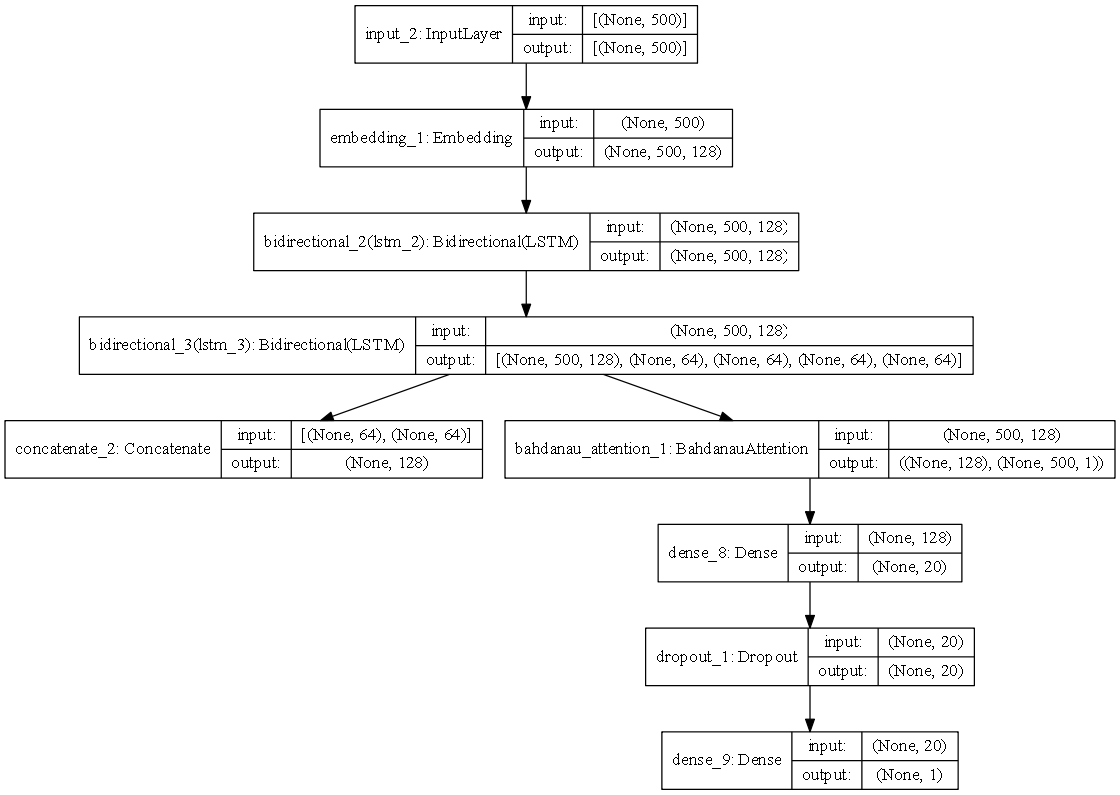

In [44]:
plot_model(model, show_shapes=True, dpi=90)

In [ ]:
history = model.fit(x_train, y_train, epochs=3, batch_size=256,
                   validation_data=(x_test, y_test), verbose=1)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model.evaluate(x_test, y_test)[1]

In [28]:
import numpy as np

In [29]:
weights = model.get_weights()
weights = np.array(weights)
weights.shape

C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(23,)

In [33]:
weights[21]

array([[-0.334466  ],
       [ 0.39164537],
       [-0.5198828 ],
       [ 0.32644925],
       [ 0.09818515],
       [ 0.17598975],
       [ 0.22005011],
       [-0.48518544],
       [ 0.3455288 ],
       [ 0.22149731],
       [ 0.31767514],
       [ 0.3648288 ],
       [-0.54297435],
       [ 0.41911003],
       [-0.5385703 ],
       [ 0.17710096],
       [-0.4433438 ],
       [ 0.52971697],
       [ 0.44437993],
       [-0.52350616]], dtype=float32)

In [1]:
import numpy as np

x_train = [[1,2,3,4,5],[6,7,8,9,10]]
x_train = np.array(x_train)

In [2]:
from tensorflow.keras.layers import Flatten

In [3]:
model = Flatten(input_shape=(2,))

AttributeError: 'Flatten' object has no attribute 'fit'